In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

df1 = pd.read_csv('example_retail_sales.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
ds    293 non-null object
y     293 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [2]:
df1.head(3)

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336


데이터 프레임에 컬럼 추가

In [4]:
df1['y_orig'] = df1.y
df1.head(3)

,ds,y,y_orig
0,1992-01-01,146376,146376
1,1992-02-01,147079,147079
2,1992-03-01,159336,159336


numpy의 y를 log 로 변환 

In [6]:
df1['y']=np.log(df1['y'])
df1.head(3)

,ds,y,y_orig
0,1992-01-01,2.476029,146376
1,1992-02-01,2.476431,147079
2,1992-03-01,2.483136,159336


prophet으로 예측 모델을 만들어 학습

In [8]:
model = Prophet()
model.fit(df1)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


prophet으로 미래 값을 예측

In [9]:
future_data = model.make_future_dataframe(periods=12, freq = 'm')
forecast_data = model.predict(future_data)
forecast_data.tail(5)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
300,2016-12-31,2.569755,2.568938,2.570347,2.558334,2.562151,-0.009365,-0.009365,-0.009365,-0.009365,-0.009365,-0.009365,-0.009365,-0.009365,-0.009365,2.560390
301,2017-01-31,2.569983,2.568930,2.570786,2.559876,2.564200,-0.007776,-0.007776,-0.007776,-0.007776,-0.007776,-0.007776,-0.007776,-0.007776,-0.007776,2.562207
302,2017-02-28,2.570188,2.568852,2.571142,2.567753,2.572086,-0.000270,-0.000270,-0.000270,-0.000270,-0.000270,-0.000270,-0.000270,-0.000270,-0.000270,2.569918
303,2017-03-31,2.570415,2.568752,2.571586,2.566665,2.571219,-0.001390,-0.001390,-0.001390,-0.001390,-0.001390,-0.001390,-0.001390,-0.001390,-0.001390,2.569025
304,2017-04-30,2.570635,2.568770,2.572048,2.570653,2.575488,0.002480,0.002480,0.002480,0.002480,0.002480,0.002480,0.002480,0.002480,0.002480,2.573115


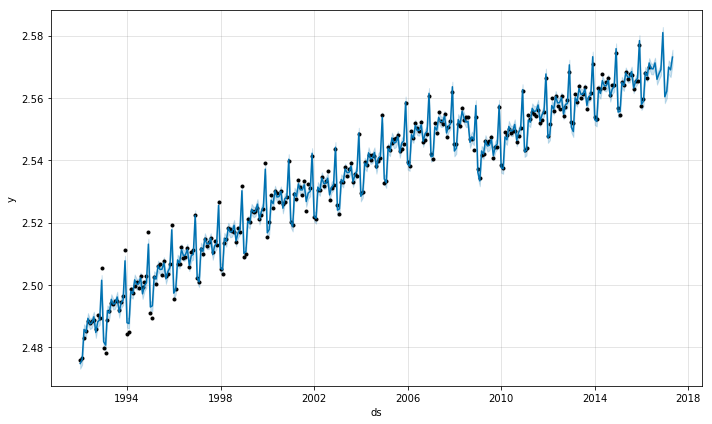

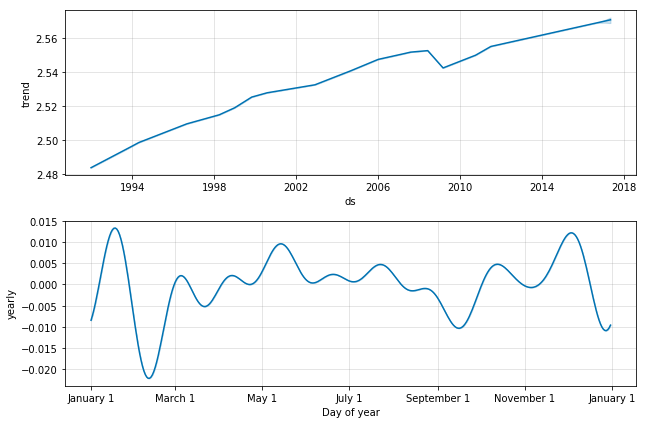

In [10]:
model.plot(forecast_data)
model.plot_components(forecast_data)
plt.show()

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


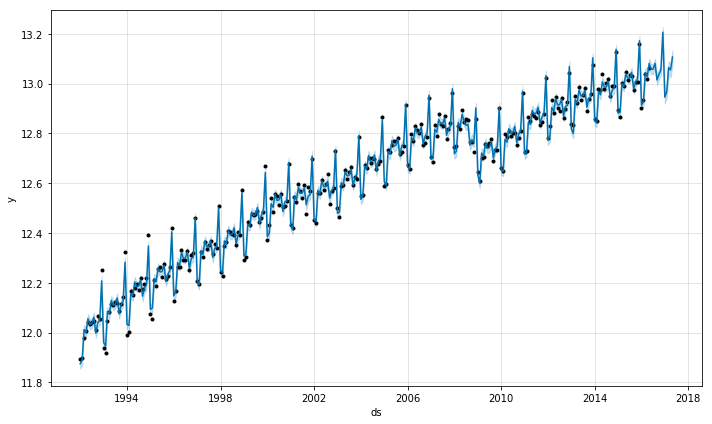

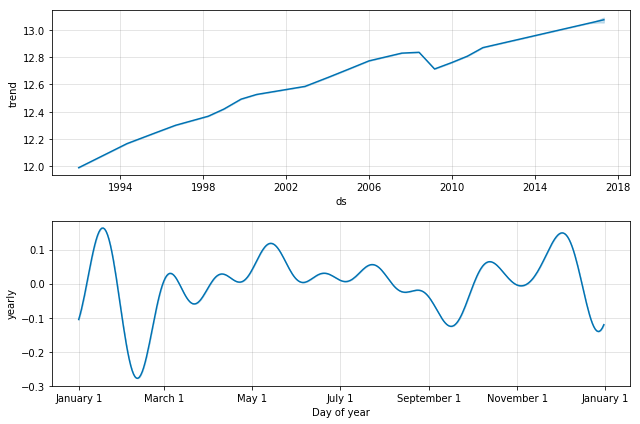

In [11]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

df1 = pd.read_csv('example_retail_sales.csv')
df1['y_orig'] = df1.y
df1['y'] = np.log(df1['y'])

model = Prophet()
model.fit(df1)

future_data = model.make_future_dataframe(periods=12, freq = 'm')
forecast_data = model.predict(future_data)

model.plot(forecast_data)
model.plot_components(forecast_data)
plt.show()